<a href="https://colab.research.google.com/github/Satvik256/TestRepo/blob/master/planet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [34]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My\Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
path= '/content/gdrive/My Drive/fastai-v3/data/planet/'

In [4]:
!p7zip -d /content/gdrive/My\ Drive/fastai-v3/data/planet/train-jpg.tar.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/My Drive/fastai-v3/data/planet/                                                         1 file, 629296207 bytes (601 MiB)

Extracting archive: /content/gdrive/My Drive/fastai-v3/data/planet/train-jpg.tar.7z
--
Path = /content/gdrive/My Drive/fastai-v3/data/planet/train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train-jpg.tar                      1% - train-jpg.tar                      2% - train-jpg.tar                    

In [5]:
!tar -xvf /content/train-jpg.tar

Streaming output truncated to the last 5000 lines.
train-jpg/train_18344.jpg
train-jpg/train_27704.jpg
train-jpg/train_7979.jpg
train-jpg/train_13032.jpg
train-jpg/train_35254.jpg
train-jpg/train_30338.jpg
train-jpg/train_27364.jpg
train-jpg/train_20550.jpg
train-jpg/train_15082.jpg
train-jpg/train_34316.jpg
train-jpg/train_35048.jpg
train-jpg/train_35424.jpg
train-jpg/train_5090.jpg
train-jpg/train_5713.jpg
train-jpg/train_39060.jpg
train-jpg/train_11864.jpg
train-jpg/train_36277.jpg
train-jpg/train_14203.jpg
train-jpg/train_12909.jpg
train-jpg/train_12433.jpg
train-jpg/train_37809.jpg
train-jpg/train_6081.jpg
train-jpg/train_32372.jpg
train-jpg/train_34065.jpg
train-jpg/train_2274.jpg
train-jpg/train_20986.jpg
train-jpg/train_3903.jpg
train-jpg/train_4412.jpg
train-jpg/train_21703.jpg
train-jpg/train_5448.jpg
train-jpg/train_20568.jpg
train-jpg/train_5143.jpg
train-jpg/train_3306.jpg
train-jpg/train_17657.jpg
train-jpg/train_22337.jpg
train-jpg/train_5173.jpg
train-jpg/train_19085.jp

In [0]:
!mv /content/train-jpg/ /content/gdrive/My\ Drive/fastai-v3/data/planet/

In [0]:
df=pd.read_csv(path+'/train_v2.csv')

In [0]:
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms=get_transforms(flip_vert=True,max_zoom=1.05,max_warp=0.0,max_lighting=0.1)

In [0]:
np.random.seed(42)
src=(ImageList.from_csv('/content/gdrive/My Drive/fastai-v3/data/planet/','train_v2.csv',folder='train-jpg',suffix='.jpg')
              .split_by_rand_pct(0.2)
              .label_from_df(label_delim=' '))

In [0]:
data=(src.transform(tfms,size=256).databunch().normalize(imagenet_stats))

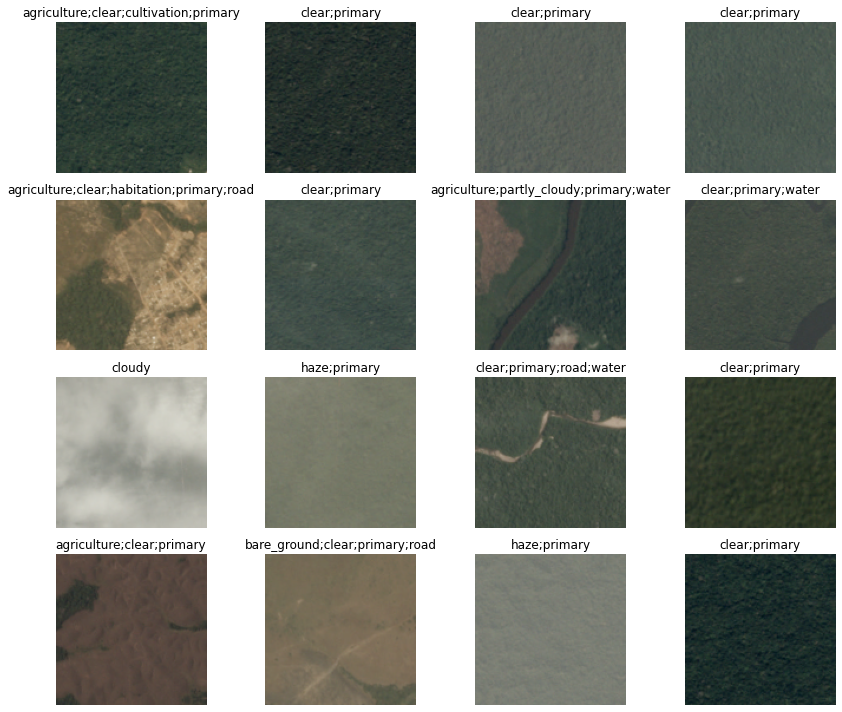

In [12]:
data.show_batch(rows=4,figsize=(12,10))

In [0]:
acc_02=partial(accuracy_thresh,thresh=0.2)
f_score=partial(fbeta,thresh=0.2)
learn=cnn_learner(data,models.resnet50,metrics=[f_score,acc_02])

In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


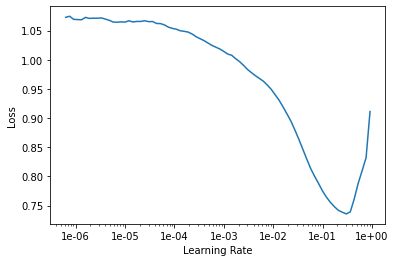

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(5,slice(0.01))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.134274,0.115821,0.900145,0.944010,05:11
1,0.114229,0.099133,0.915669,0.948523,05:13
2,0.107643,0.092935,0.918869,0.956211,05:16
3,0.095721,0.088274,0.924117,0.957076,05:23
4,0.091718,0.087480,0.925675,0.957803,05:23


In [17]:
interp=ClassificationInterpretation.from_learner(learn)

In [20]:
plot_multi_top_losses??

Object `plot_multi_top_losses` not found.


172 misclassified samples over 8095 samples in the validation set.


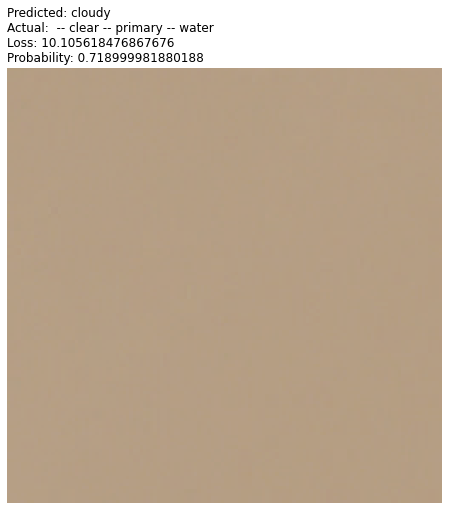

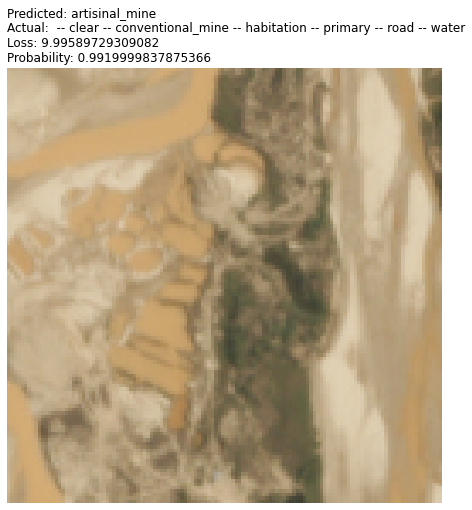

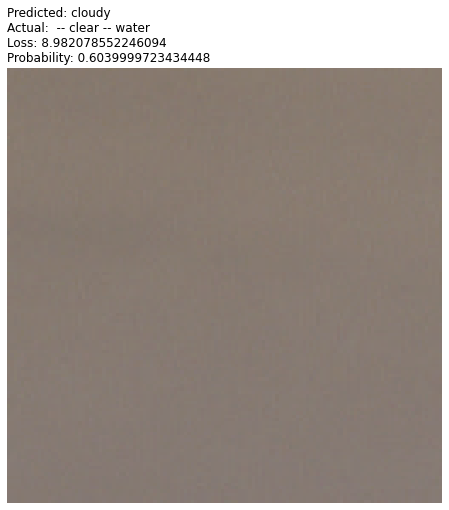

In [18]:
interp.plot_multi_top_losses()

In [0]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(5,slice(1e-5,2e-3))

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.156824,0.108687,0.906613,0.953777,07:48
1,0.112239,0.094376,0.919440,0.954743,08:07
2,0.099152,0.090134,0.924772,0.956160,07:58
3,0.088418,0.083457,0.928831,0.958304,07:56
4,0.084631,0.082629,0.928919,0.959161,07:23


In [0]:
learn.save('stage-1')

In [40]:
learn.lr_find()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


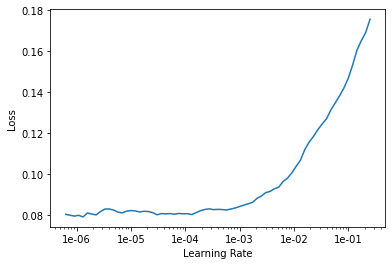

In [41]:
learn.recorder.plot()